In [ ]:
# Importing the required modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [ ]:
pip install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [ ]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [ ]:
# Obtaining data specific to Anantapur

In [ ]:
df = df[df['District'] == 'East Godavari']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
611,611,17.44,81.92,East Godavari,Gangavaram,Gangavaram,Red Soils,5.72,0.05,0.24,1.24,128.0,890.0,245.0,3.75,0.35,0.43,13.30,1.28,48.43,0.809552,0.677846,2.458942,4.629907,-0.698337,Topioca
612,612,17.44,81.92,East Godavari,Gangavaram,Gangavaram,Red Soils,5.45,0.06,0.32,1.83,105.0,727.0,169.0,4.15,0.57,0.49,16.71,1.54,61.84,0.809552,0.677846,2.458942,4.629907,-0.698337,"Topioca, Cashew"
613,613,17.43,81.92,East Godavari,Gangavaram,Gangavaram,Red Soils,5.93,0.08,0.39,2.12,77.0,734.0,169.0,7.12,0.47,0.51,24.27,1.72,47.76,0.667313,0.477157,1.611796,3.374576,-0.627878,Paddy
614,614,17.42,81.91,East Godavari,Gangavaram,Gangavaram,Red Soils,5.33,0.08,0.58,7.36,87.0,527.0,133.0,12.00,1.47,0.35,84.06,2.40,33.52,0.677633,0.494691,1.791405,3.501484,-0.636462,Paddy
615,615,17.42,81.91,East Godavari,Gangavaram,Gangavaram,Red Soils,6.95,0.05,0.23,1.23,57.0,1132.0,479.0,2.14,0.47,0.42,13.43,1.69,32.92,0.677633,0.494691,1.791405,3.501484,-0.636462,"Topica, Paddy"


In [ ]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,6.226818,0.209773,0.482273,12.031591,157.500000,953.750000,206.409091,9.929091,0.894091,0.422955,37.901591,1.845909,36.977727,0.682564
std,0.746171,0.495681,0.217286,18.528432,70.436348,753.495208,153.266346,11.099844,0.581147,0.166616,32.566430,0.899215,19.727601,0.096287
min,4.820000,0.040000,0.080000,0.740000,57.000000,223.000000,33.000000,1.040000,0.320000,0.170000,5.050000,0.500000,5.090000,0.511562
25%,5.767500,0.060000,0.357500,2.415000,106.500000,578.750000,126.750000,3.585000,0.550000,0.290000,13.397500,1.180000,22.590000,0.570782
50%,6.130000,0.090000,0.455000,4.915000,148.000000,753.500000,155.500000,5.695000,0.685000,0.420000,26.960000,1.705000,33.730000,0.738791
75%,6.672500,0.170000,0.580000,9.970000,188.000000,982.500000,245.500000,11.355000,0.972500,0.520000,50.015000,2.455000,47.927500,0.754321
max,8.000000,3.350000,1.180000,82.510000,392.000000,3794.000000,777.000000,56.310000,3.010000,0.810000,121.720000,4.410000,87.300000,0.809552


In [ ]:
# Analysis of SoilType

In [ ]:
df.SoilType.unique()

array(['Red Soils', 'Red sandy loam'], dtype=object)

In [ ]:
df['SoilType'] = df['SoilType'].replace('Red Soils', 'Red Soil')
df['SoilType'] = df['SoilType'].replace('Red sandy loam', 'Red Sandy Loam Soil')
df.SoilType.unique()

array(['Red Soil', 'Red Sandy Loam Soil'], dtype=object)

In [ ]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Sandy Loam Soil': 13, 'Red Soil': 31}

<BarContainer object of 2 artists>

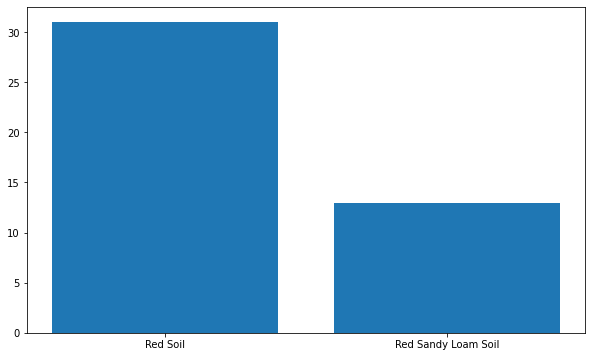

In [ ]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [ ]:
# Analysis of Crops grown 

In [ ]:
df.Crop.unique()

array(['Topioca  ', 'Topioca, Cashew', 'Paddy', 'Topica, Paddy',
       'Topioca', 'Cashew, Mango', 'Topioca (Sample-2)',
       'Topioca (Sample-1)', 'Paddy (Sample-2)', 'Cotton (Sample-1)',
       'Cotton ', 'Cotton', 'Cotton, Topioca', 'Paddy, Brinjal',
       'Cotton, Redgram', 'Paddy (Sample-1)'], dtype=object)

In [ ]:
df['Crop'].value_counts()

Paddy                 21
Topioca                4
Cotton                 4
Cotton (Sample-1)      2
Paddy (Sample-2)       2
Cotton, Redgram        1
Cotton                 1
Paddy, Brinjal         1
Cotton, Topioca        1
Cashew, Mango          1
Paddy (Sample-1)       1
Topica, Paddy          1
Topioca (Sample-1)     1
Topioca (Sample-2)     1
Topioca, Cashew        1
Topioca                1
Name: Crop, dtype: int64

Paddy      25
Cotton      8
Tapioca     8
Name: Crop, dtype: int64


<BarContainer object of 3 artists>

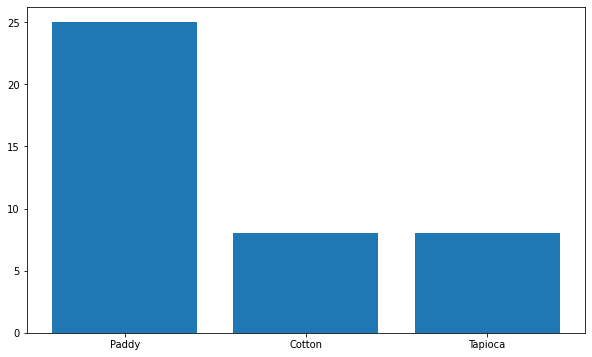

In [ ]:
df['Crop'] = df['Crop'].replace(['Cotton (Sample-1)', 'Cotton ', 'Cotton', 'Cotton, Redgram'], 'Cotton')
df['Crop'] = df['Crop'].replace(['Paddy, Brinjal', 'Paddy (Sample-1)', 'Paddy (Sample-2)'], 'Paddy')
df['Crop'] = df['Crop'].replace(['Topioca', 'Topioca, Cashew', 'Topioca  ', 'Topioca (Sample-2)', 'Topioca (Sample-1)'], 'Tapioca')
df = df[(df['Crop'] != 'Topica, Paddy') & (df['Crop'] != 'Cashew, Mango') & (df['Crop'] != 'Cotton, Topioca')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [ ]:
df = df[(df["Crop"] != 'SweetCorn') & (df["Crop"] != 'Mango') & (df["Crop"] != 'HorseGram')]

In [ ]:
# Getting rid of features that have a high correlation among one another

In [ ]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI
pH,1.000000,0.350693,0.241096,0.127105,0.148829,0.695071,0.591943,0.188963,0.042814,0.043501,-0.141149,0.161902,-0.556459,-0.079519
EC,0.350693,1.000000,0.564192,0.163832,0.433282,0.563984,0.397651,0.758502,0.222021,0.528984,-0.033599,0.214563,-0.015411,-0.126957
OC,0.241096,0.564192,1.000000,0.296454,0.379856,0.282452,0.266818,0.508410,0.518181,0.539134,0.427353,0.611589,-0.016304,0.119039
P,0.127105,0.163832,0.296454,1.000000,0.236829,0.020361,0.018558,-0.066209,0.878455,0.076579,0.663295,0.462322,-0.154802,-0.244235
K,0.148829,0.433282,0.379856,0.236829,1.000000,0.112563,0.267932,0.095924,0.260360,0.464705,-0.060808,-0.074361,0.070945,-0.198360
Ca,0.695071,0.563984,0.282452,0.020361,0.112563,1.000000,0.766683,0.346891,-0.021570,0.273129,-0.143852,0.181346,-0.369081,-0.040868
Mg,0.591943,0.397651,0.266818,0.018558,0.267932,0.766683,1.000000,0.201328,0.075967,0.373499,-0.086178,0.273140,-0.210540,0.056137
S,0.188963,0.758502,0.508410,-0.066209,0.095924,0.346891,0.201328,1.000000,0.042084,0.389747,0.068553,0.338286,-0.088672,0.030751
Zn,0.042814,0.222021,0.518181,0.878455,0.260360,-0.021570,0.075967,0.042084,1.000000,0.185091,0.819179,0.623415,-0.016939,-0.207815
B,0.043501,0.528984,0.539134,0.076579,0.464705,0.273129,0.373499,0.389747,0.185091,1.000000,0.081734,0.277509,0.175012,-0.023654


In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['OC', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Fe', 'Cu']


In [ ]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'P', 'K', 'Mn', 'NDVI', 'Crop']


In [ ]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

       pH    EC     P      K     Mn      NDVI  Red Sandy Loam Soil  Red Soil
611  5.72  0.05  1.24  128.0  48.43  0.809552                    0         1
611    Tapioca
Name: Crop, dtype: object


In [ ]:
# Standardizing the independent variables using Feature Scaling
sc = StandardScaler()
X[:, 0:6] = sc.fit_transform(X[:, 0:6])

In [ ]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [ ]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [ ]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [ ]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [ ]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [ ]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.5263157894736842


In [ ]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 67.67 %
Standard Deviation: 18.14 %


# Decision Tree Classifier

In [ ]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [ ]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.6842105263157895


In [ ]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 71.67 %
Standard Deviation: 20.78 %


# Random Forest Classifier

In [ ]:
clf3_3 = RandomForestClassifier(random_state=0)
clf3_3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_test_pred = clf3_3.predict(X_test)
y_train_pred = clf3_3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [ ]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7368421052631579


In [ ]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3_3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 79.67 %
Standard Deviation: 18.47 %


In [ ]:
# pickle.dump(clf3_3, open('EG_model.pkl', 'wb'))
# pickle.dump(sc2, open('EG_scaler.pkl', 'wb'))

# XGBoost

In [ ]:
clf4_4 = HistGradientBoostingClassifier(random_state=0)
clf4_4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [ ]:
y_test_pred = clf4_4.predict(X_test)
y_train_pred = clf4_4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [ ]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  0.8214285714285714
Testing Accuracy:  0.5263157894736842


In [ ]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4_4, X = X_train, y = y_train, cv = 10)

In [ ]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 63.00 %
Standard Deviation: 18.53 %


In [ ]:
# pickle.dump(clf4_4, open('Anantapur_model.pkl', 'wb'))
# pickle.dump(sc2, open('Anantapur_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [ ]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [ ]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [ ]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8928571428571429
Testing Accuracy:  0.47368421052631576


In [ ]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 71.33 %
Standard Deviation: 21.46 %


# Catboost

In [ ]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.0041959	total: 46.7ms	remaining: 4.62s
1:	learn: 0.8530693	total: 47.7ms	remaining: 2.34s
2:	learn: 0.7282904	total: 48.2ms	remaining: 1.56s
3:	learn: 0.6679895	total: 48.7ms	remaining: 1.17s
4:	learn: 0.6185150	total: 49.2ms	remaining: 934ms
5:	learn: 0.5612941	total: 49.6ms	remaining: 777ms
6:	learn: 0.5009748	total: 50.2ms	remaining: 667ms
7:	learn: 0.4258453	total: 50.7ms	remaining: 583ms
8:	learn: 0.3937710	total: 51.2ms	remaining: 517ms
9:	learn: 0.3562419	total: 51.7ms	remaining: 465ms
10:	learn: 0.2945870	total: 52.1ms	remaining: 422ms
11:	learn: 0.2885281	total: 52.6ms	remaining: 386ms
12:	learn: 0.2679968	total: 53.1ms	remaining: 355ms
13:	learn: 0.2593378	total: 53.5ms	remaining: 329ms
14:	learn: 0.2360270	total: 54ms	remaining: 306ms
15:	learn: 0.2245321	total: 54.4ms	remaining: 286ms
16:	learn: 0.2126385	total: 54.6ms	remaining: 267ms
17:	learn: 0.2038986	total: 55.1ms	remaining: 251ms
18:	learn: 0.1997312	total: 55.6ms	remaining: 237ms
19:	learn: 0.1938168	tot

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 1.009541702
bestIteration = 78

Training on fold [1/5]

bestTest = 0.8284355607
bestIteration = 98

Training on fold [2/5]

bestTest = 1.018657534
bestIteration = 96

Training on fold [3/5]

bestTest = 0.8939495715
bestIteration = 99

Training on fold [4/5]

bestTest = 0.856594
bestIteration = 98



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
2:	learn: 1.0096129	total: 1.81ms	remaining: 603ms
3:	learn: 0.9767558	total: 2.49ms	remaining: 620ms
4:	learn: 0.9544598	total: 3.24ms	remaining: 645ms
5:	learn: 0.9342209	total: 3.97ms	remaining: 659ms
6:	learn: 0.9151801	total: 4.78ms	remaining: 678ms
7:	learn: 0.9050212	total: 5.47ms	remaining: 679ms
8:	learn: 0.8891964	total: 6.11ms	remaining: 672ms
9:	learn: 0.8759372	total: 6.88ms	remaining: 681ms
10:	learn: 0.8557482	total: 7.52ms	remaining: 676ms
11:	learn: 0.8473199	total: 8.18ms	remaining: 674ms
12:	learn: 0.8306853	total: 8.84ms	remaining: 671ms
13:	learn: 0.8129484	total: 9.48ms	remaining: 668ms
14:	learn: 0.7978796	total: 10.1ms	remaining: 664ms
15:	learn: 0.7846842	total: 10.7ms	remaining: 661ms
16:	learn: 0.7757112	total: 11.4ms	remaining: 658ms
17:	learn: 0.7581273	total: 12ms	remaining: 655ms
18:	learn: 0.7427539	total: 12.6ms	remaining: 652ms
19:	learn: 0.7295289	total: 13.4ms	remaining: 659ms
20:	learn: 0.7203858	to